# Declare the necessary libraries and data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

# EDA

## Understand the basic data and handle null values

In [6]:
def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print("Duplicate Rows",df[dups])
    plt.figure(figsize=(10,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
dataoverview(df, 'A Overview about the healthcare dataset')

A Overview about the healthcare dataset:
5 first rows: 
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [8]:
mean_bmi = round(df['bmi'].mean(), 1)
df['bmi'].fillna(mean_bmi, inplace=True)

## Save Data

In [10]:
df.to_csv('healthcare_dataset_clean.csv', index=False)

## Understand the data through charts and correlation matrix

In [12]:
def eda_dataset(df):
    #Separating columns to be visualized
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      + df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()

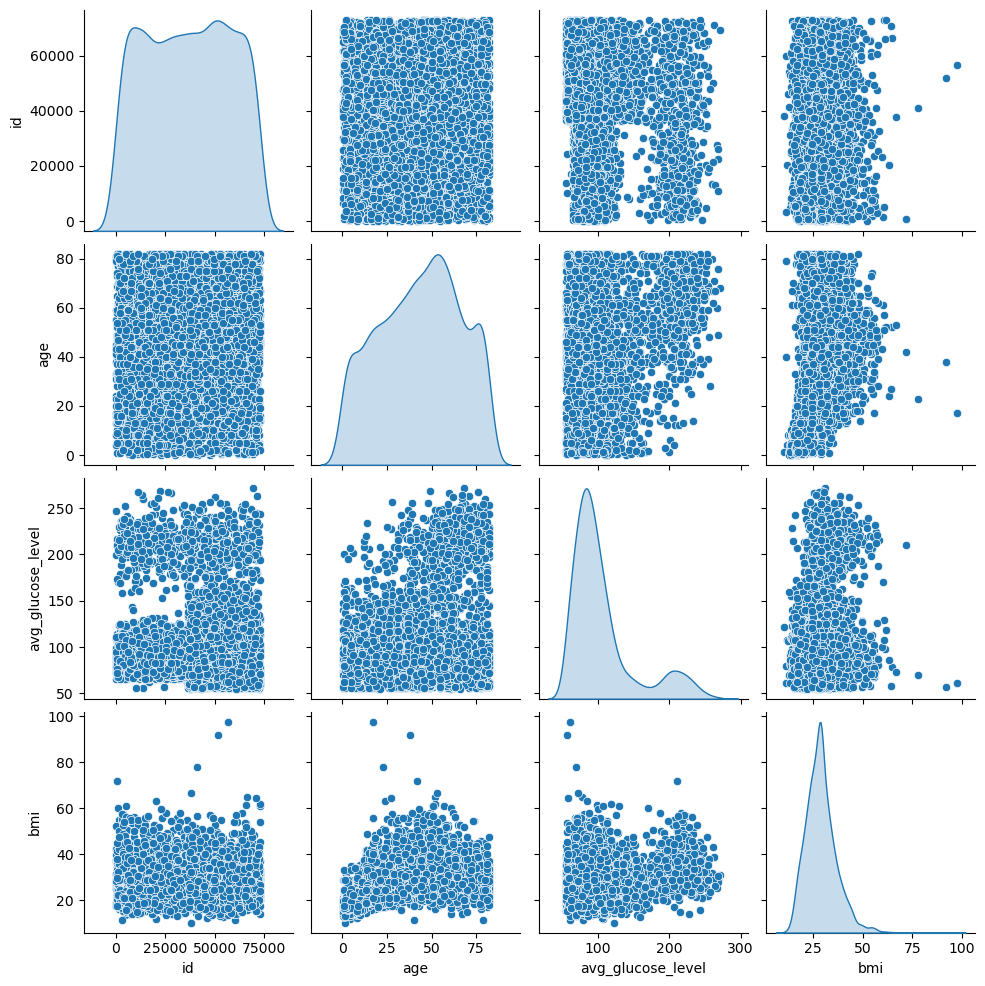

In [13]:
eda_dataset(df)

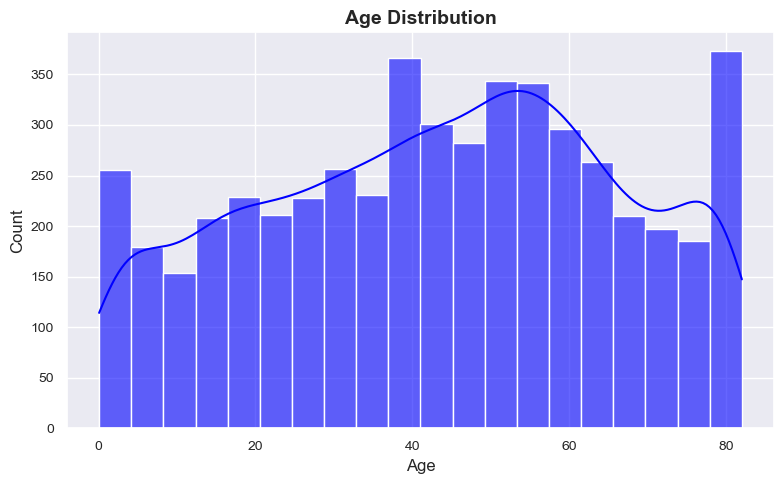

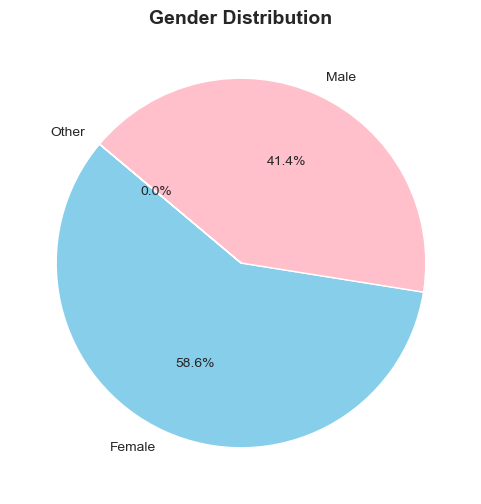

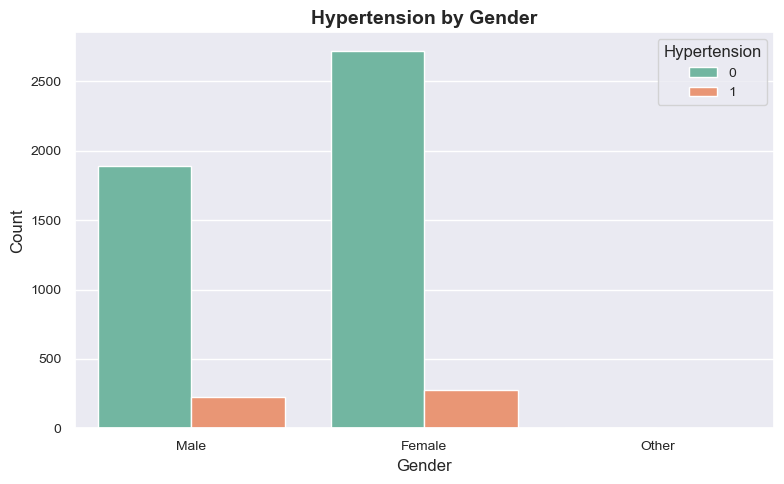

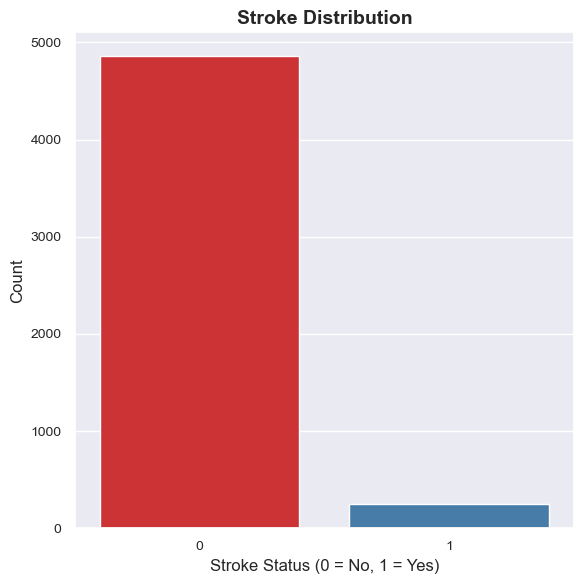

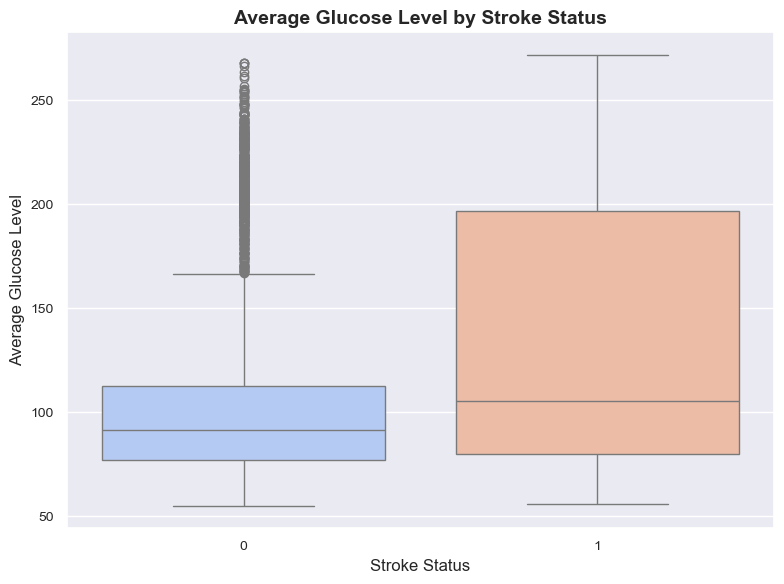

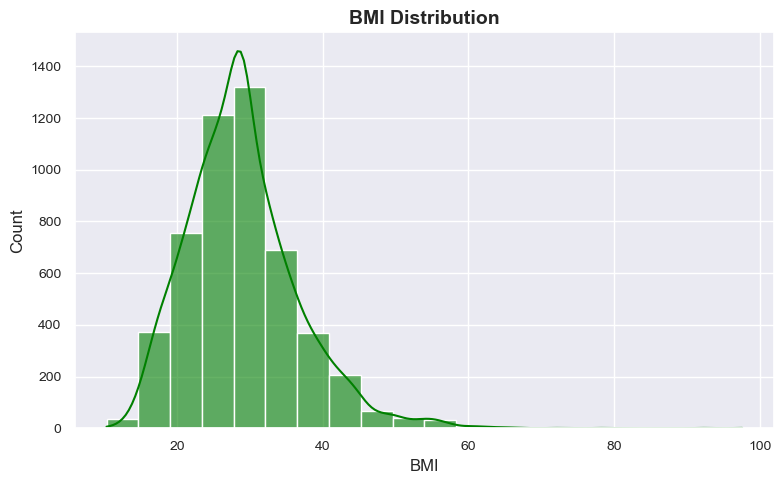

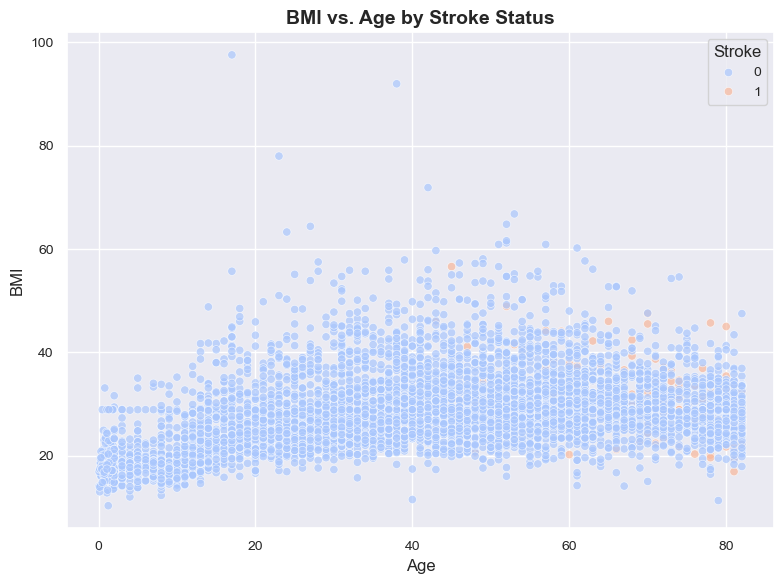

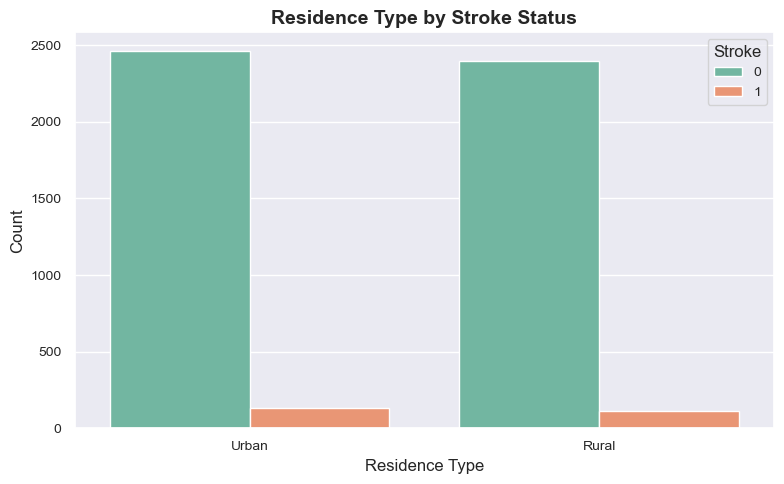

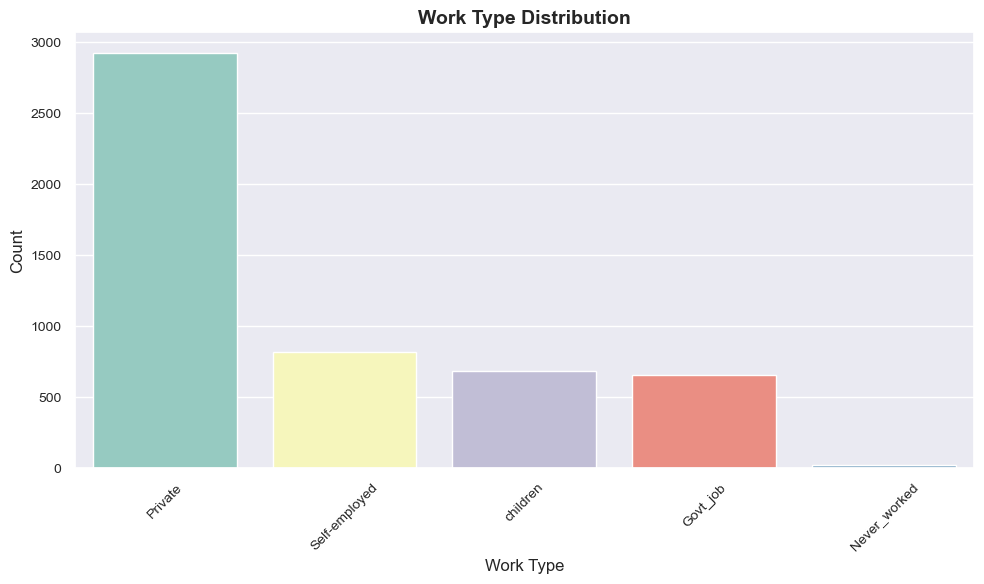

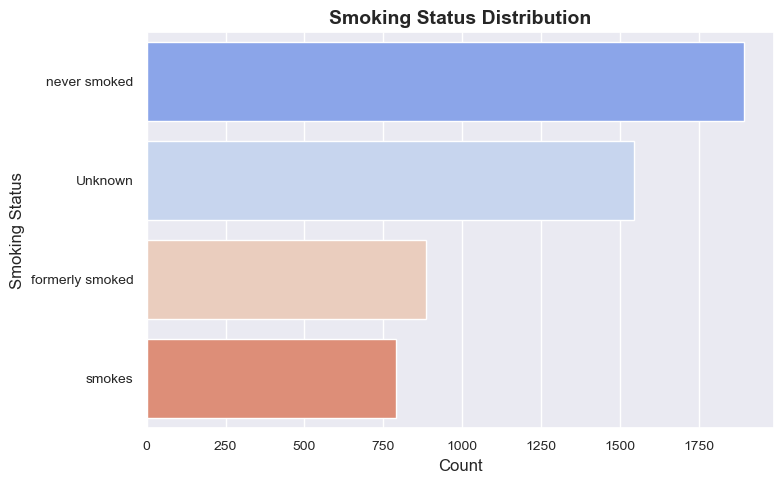

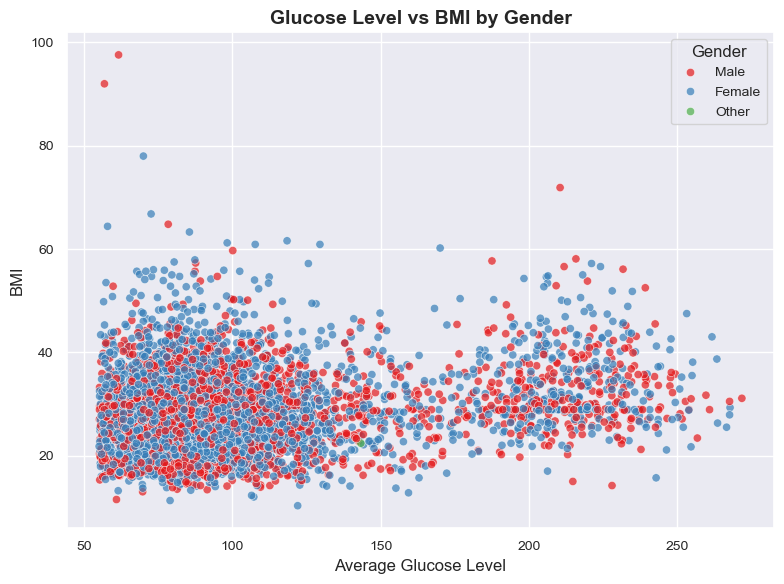

<Figure size 1000x600 with 0 Axes>

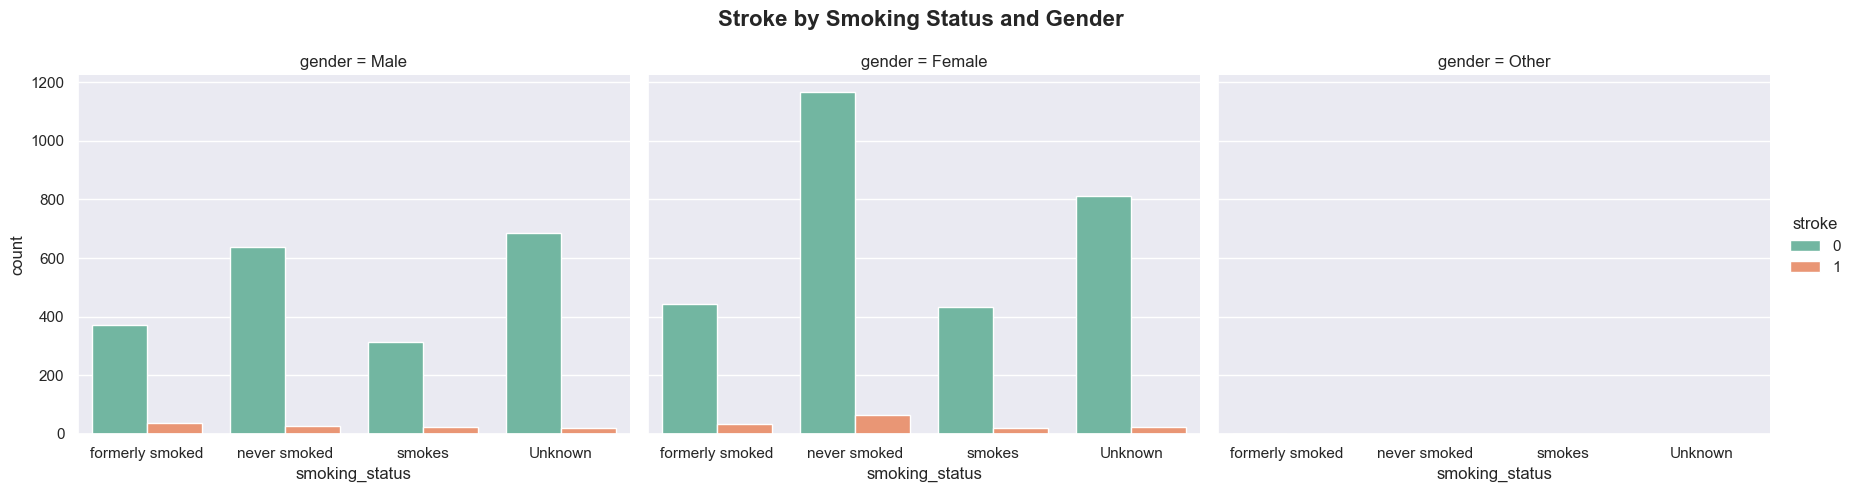

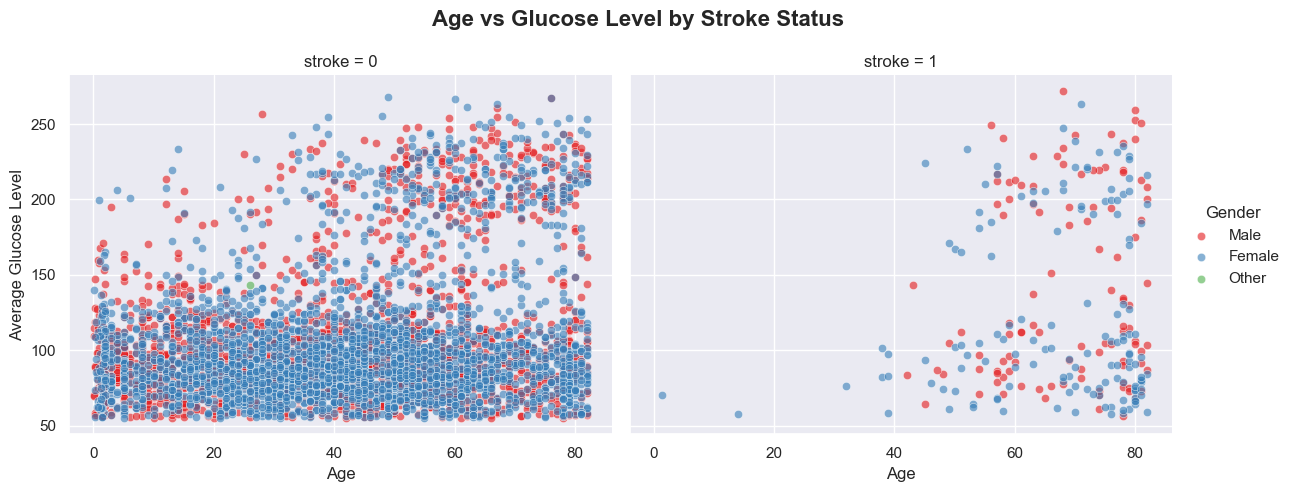

In [14]:
# General plot settings
sns.set(style="darkgrid")

# Helper function for consistent plot customization
def customize_plot(title, xlabel='', ylabel='', legend_title=None, rotation=0):
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    if legend_title:
        plt.legend(title=legend_title, fontsize=10)
    plt.xticks(rotation=rotation, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='blue', alpha=0.6)
customize_plot('Age Distribution', 'Age', 'Count')
plt.show()

# 2. Gender Distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=['skyblue', 'pink', 'lightgreen'], textprops={'fontsize': 10})
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.show()

# 3. Hypertension by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='hypertension', data=df, palette='Set2')
customize_plot('Hypertension by Gender', 'Gender', 'Count', 'Hypertension')
plt.show()

# 4. Stroke Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='stroke', data=df, palette='Set1')
customize_plot('Stroke Distribution', 'Stroke Status (0 = No, 1 = Yes)', 'Count')
plt.show()

# 5. Average Glucose Level by Stroke Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='coolwarm')
customize_plot('Average Glucose Level by Stroke Status', 'Stroke Status', 'Average Glucose Level')
plt.show()

# 6. BMI Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], bins=20, kde=True, color='green', alpha=0.6)
customize_plot('BMI Distribution', 'BMI', 'Count')
plt.show()

# 7. BMI vs. Age by Stroke Status
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', hue='stroke', data=df, palette='coolwarm', alpha=0.7)
customize_plot('BMI vs. Age by Stroke Status', 'Age', 'BMI', 'Stroke')
plt.show()

# 8. Residence Type by Stroke Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Residence_type', hue='stroke', data=df, palette='Set2')
customize_plot('Residence Type by Stroke Status', 'Residence Type', 'Count', 'Stroke')
plt.show()

# 9. Work Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', data=df, palette='Set3', order=df['work_type'].value_counts().index)
customize_plot('Work Type Distribution', 'Work Type', 'Count', rotation=45)
plt.show()

# 10. Smoking Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='smoking_status', data=df, palette='coolwarm', order=df['smoking_status'].value_counts().index)
customize_plot('Smoking Status Distribution', xlabel='Count', ylabel='Smoking Status')
plt.show()

# 11. Glucose Level vs BMI (Overall)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='gender', data=df, palette='Set1', alpha=0.7)
customize_plot('Glucose Level vs BMI by Gender', 'Average Glucose Level', 'BMI', 'Gender')
plt.show()

# 13. Stroke by Smoking Status and Gender
plt.figure(figsize=(10, 6))
sns.catplot(x='smoking_status', hue='stroke', col='gender', kind='count', data=df, palette='Set2', height=5, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Stroke by Smoking Status and Gender', fontsize=16, fontweight='bold')
plt.show()

# 14. Age vs Glucose Level Facet by Stroke
g = sns.FacetGrid(df, col='stroke', hue='gender', height=5, aspect=1.2, palette='Set1')
g.map(sns.scatterplot, 'age', 'avg_glucose_level', alpha=0.6)
g.add_legend(title='Gender')
g.set_axis_labels('Age', 'Average Glucose Level')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Age vs Glucose Level by Stroke Status', fontsize=16, fontweight='bold')
plt.show()


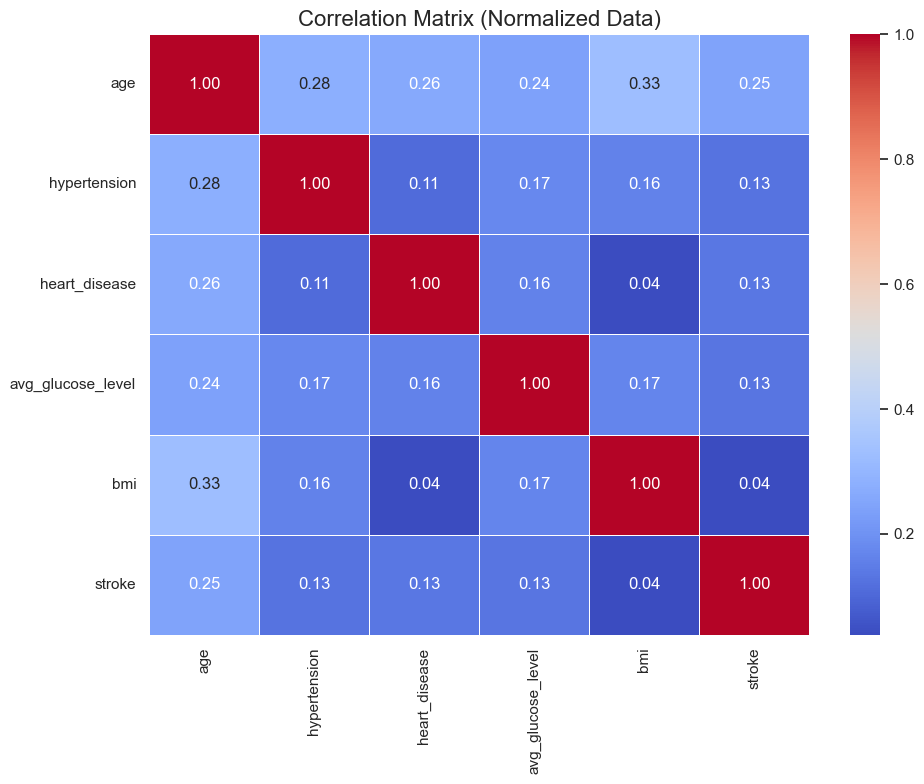

In [15]:
# Step 1: Select numerical columns for correlation matrix
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']  # Update with your numerical columns

# Step 2: Normalize the data using Z-score normalization
scaler = StandardScaler()
df_scaled = df[numerical_cols].copy()  # Only select numerical columns
df_scaled = scaler.fit_transform(df_scaled)

# Convert the normalized data back into a DataFrame for easier visualization
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

# Step 3: Compute the correlation matrix
correlation_matrix = df_scaled.corr()

# Step 4: Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Normalized Data)', fontsize=16)
plt.tight_layout()
plt.show()
